In [10]:
import tensorflow as tf

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils.helper import fn_plot_tf_hist

In [3]:
start = -2.1
end = 2.1
delta= 0.001
#train data
X_train = np.arange(start,end,delta)
y_true = 2*np.square(X_train) + 2*np.sin(np.pi*X_train)
y_rng = np.random.rand(X_train.shape[0]) - 0.5
y_train = y_true +y_rng
y_train.min(),y_true.max()

#test data
X_test = np.arange(start,end+delta,delta*10)
y_true_test = 2*np.square(X_test) + 2*np.sin(np.pi*X_test)
y_rng = np.random.rand(X_test.shape[0]) - 0.5
y_test = y_true_test +y_rng
y_test.min(),y_true_test.max()

(np.float64(-2.0342107688219313), np.float64(9.438033988748606))

In [4]:
BATCH_SIZE = 32
num_example = 262*BATCH_SIZE
X_train = X_train[:num_example]
y_train = y_train[:num_example]
y_true = y_true[:num_example]

X_train.shape,y_train.shape,y_true.shape

((4200,), (4200,), (4200,))

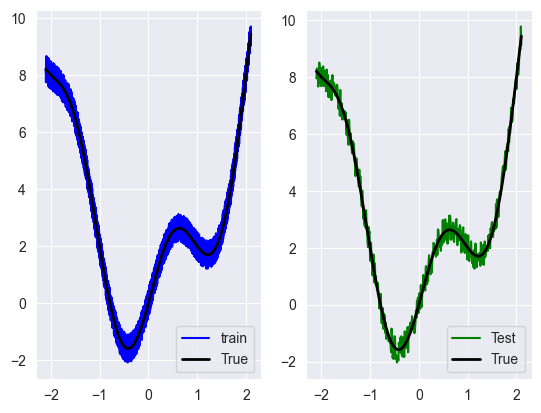

In [9]:
fig,axes = plt.subplots(1,2)
ax = axes[0]
ax.plot(X_train,y_train,"b",label = 'train')
ax.plot(X_train,y_true,c = 'k',linewidth = 2, label = 'True')
ax.legend()

ax = axes[1]
ax.plot(X_test,y_test,"g",label = 'Test')
ax.plot(X_test,y_true_test,c = 'k',linewidth = 2, label = 'True')
ax.legend()

In [13]:
train_ds = tf.data.Dataset

# Define Model

In [15]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train,y_train))
test_ds = tf.data.Dataset.from_tensor_slices((X_test,y_test))

train_ds = train_ds.shuffle(buffer_size = X_train.shape[0]).batch(BATCH_SIZE)
test_ds = test_ds.shuffle(buffer_size = X_test.shape[0]).batch(BATCH_SIZE)

train_ds = train_ds.cache().prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size = tf.data.AUTOTUNE)

In [19]:
num_features = 1
input_layer = tf.keras.Input(shape = (1,))
hidden_layer = tf.keras.layers.Dense(512,activation = 'relu')(input_layer)
hidden_layer = tf.keras.layers.Dense(256,activation = 'relu')(hidden_layer)
output_layer = tf.keras.layers.Dense(1)(hidden_layer)
model = tf.keras.Model(inputs = input_layer, outputs = output_layer)

In [22]:
RANDOM_STATE = 42
ALPHA = 0.001
initializer = tf.keras.initializers.GlorotUniform(seed = RANDOM_STATE)
loss_fn = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.Adam(learning_rate = ALPHA)
regularizer = tf.keras.regularizers.L2(0.05)
metrics = tf.keras.metrics.MeanAbsoluteError()

In [25]:
model.compile(optimizer = optimizer,loss = loss_fn,metrics = [metrics])
history = model.fit(train_ds,validation_data = test_ds,epochs = 250)

Epoch 1/250
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 3.1368 - mean_absolute_error: 1.3429 - val_loss: 1.1610 - val_mean_absolute_error: 0.8752
Epoch 2/250
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.9963 - mean_absolute_error: 0.7592 - val_loss: 0.8429 - val_mean_absolute_error: 0.6877
Epoch 3/250
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.7429 - mean_absolute_error: 0.6539 - val_loss: 0.5525 - val_mean_absolute_error: 0.5821
Epoch 4/250
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4536 - mean_absolute_error: 0.5289 - val_loss: 0.3200 - val_mean_absolute_error: 0.4592
Epoch 5/250
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2538 - mean_absolute_error: 0.4004 - val_loss: 0.1854 - val_mean_absolute_error: 0.3492
Epoch 6/250
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1623 - mean_absolute_error: 0.3242 - val_loss: 0.1360 - val_mean_absolute_error: 0.3021
Epoch 7/250
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1328 - mean_absolute_error: 0.2

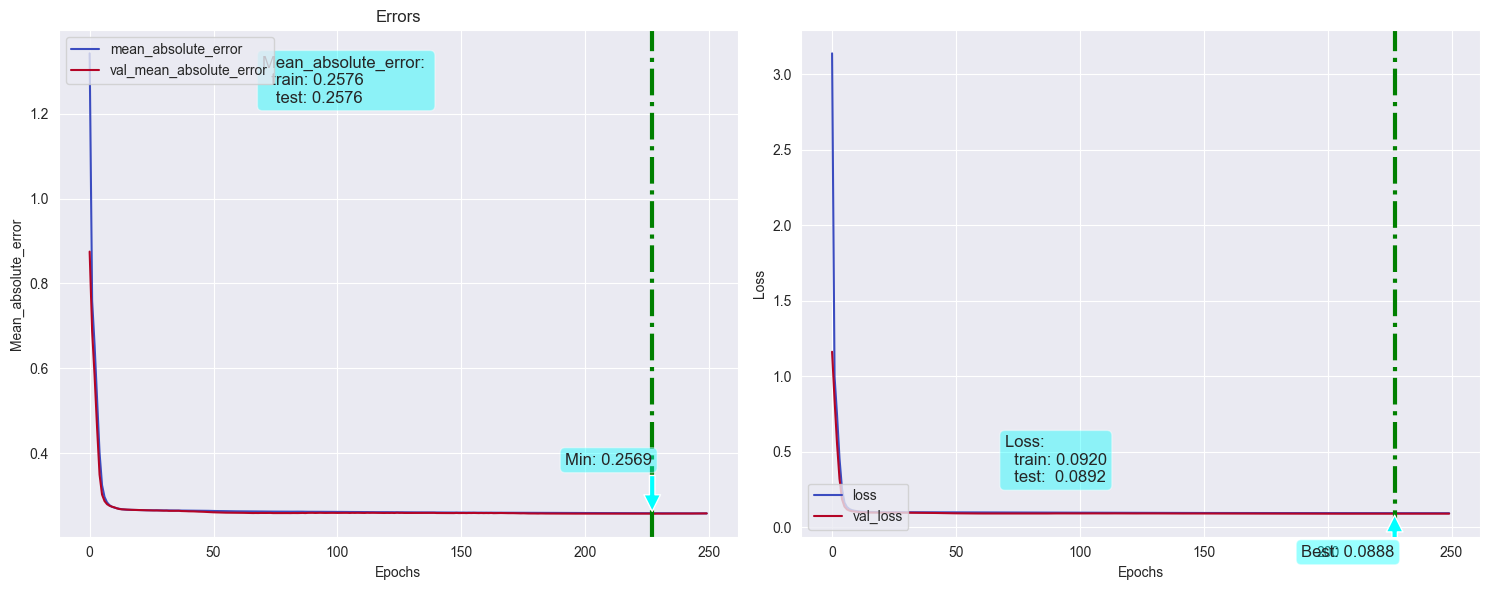

In [32]:
hist_df = pd.DataFrame(data = {'loss':history.history['loss'],
                               'mean_absolute_error':history.history['mean_absolute_error'],
                               'val_loss':history.history['val_loss'],
                               'val_mean_absolute_error':history.history['val_mean_absolute_error']})
fn_plot_tf_hist(hist_df = hist_df)